<a href="https://colab.research.google.com/github/nomiku1999/KTDLUD/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Báo cáo đồ án môn "Khoa học dữ liệu ứng dụng"

Nhóm 3:

1.   1712898 - Trần Việt Văn - tvvan99
2.   1712685 - Trần Huy Phượng - nomiku1999
3.   18120212 - Huỳnh Long Nam - JustKidding2K

Link thùng chứa Github của nhóm: https://github.com/nomiku1999/KTDLUD


## Mô tả bài toán

### Cuộc thi

* **Tên cuộc thi**: [March Machine Learning Mania 2021 - NCAAM
Predict the 2021 NCAAM Basketball Tournament](https://www.kaggle.com/competitions/ncaam-march-mania-2021/overview/description)

* **Mô tả**: Dự đoán kết quả của giải thi đấu bóng rổ NCAA 2021 dành cho nam dựa trên dữ liệu lịch sử trận đấu được lưu trữ trước đó. Cuộc thi được chia làm 2 stage
  * Stage 1: Ta sẽ dự đoán kết quả cho 5 giải gần nhất (từ 2015 đến 2019), đây là những giải đã diễn ra trước đó và có kết quả
  * Stage 2: Ta sẽ dự đoán kết quả cho giải đấu vào năm 2021 (tại thời điểm cuộc thi diễn ra giải đấu chưa được tổ chức)

* **Input**: Dữ liệu được cung cấp bao gồm lịch sử các trận đấu của giải
* **Output**: Model dự đoán kết quả của các trận đấu, tỉ lệ thắng của đội có id đứng trước so với đội có id đứng sau
* **Metric**:
$$
\textrm{LogLoss} = - \frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right],
$$
trong đó:\
$n$ là số lượng trận đấu \
$\hat{y}_i$ là kết quả dự đoán team 1 thắng team 2\
$ y_i$ có giá trị 1 nếu team 1 thắng, giá trị 0 nếu team 2 thắng

* **Dữ liệu**

  - <code>Train</code>: Dữ liệu các trận đấu từ năm 1985 đến năm 2014

  - <code>Test</code>: Dữ liệu các trận đấu từ năm 2015 đến năm 2020

  - <code>Submission file</code>: 
    - *MSampleSubmission* chứa 2 field, field đầu tiên là id của trận đấu, field thứ 2 chứa xác suất team có id nhỏ hơn đứng trước thắng trận đấu (field này phải predict)

    Ex: 
    ```
      2015_1107_1110,0.5

      2015_1107_1112,0.5
      
      2015_1107_1113,0.5
    ```
      - Số đầu tiên biểu thị cho năm, số thứ 2 là id của đội đầu tiên, số thứ 3 là id của đội thứ hai, số cuối cùng (sau dấy phẩy) biểu thị xác suất đội đầu tiên thắng đội thứ 2

      - Cuộc thi sẽ sử dụng solution để dự đoán cho kết quả thi đấu 2021 và dựa vào đó để trao giải 

## Giải quyết bài toán

### Solution

- Nhóm sẽ sử dụng solution rank 9 tại private leaderboard

- Link to solution: https://www.kaggle.com/c/ncaam-march-mania-2021/discussion/230991





- Sử dụng dữ liệu từ 3 csv file:
  * <code>MRegularSeasonCompactResults</code>: dữ liệu lịch sử trận đấu, gồm đội thắng, đội thua, điểm số
  * <code>MRegularSeasonDetailedResults</code>: dữ liệu lịch sử chi tiết bao gồm thêm 1 số field chứa thông tin thêm của trận đấu
  * <code>MMasseyOrdinals</code>: dữ liệu chứa ranking của các đội
- Sử dụng các thuật toán machine learning để dự đoán kết quả trận đấu dựa trên dữ liệu các trận đấu trong lịch sử, train 1 vài model thông dụng để chọn được model với metric tốt nhất cho dataset





### Lí do lựa chọn

* Sử dụng data dạng table, dễ thao tác, tối ưu hóa phần cứng.
* Flow sử dụng đi qua hầu hết các bước như data cleaning, trích xuất data phù hợp với yêu cầu
* Solution sử dụng cùng lúc nhiều model để predict, các model dễ hiểu và tiếp cận với nhóm.

### Các bước thực hiện



1.   Tiền xử lí và trích xuất đặc trưng
    * MRegularSeasonCompactResults: trích xuất dữ liệu win rate khi thi đấu sân nhà sân khách, điểm số cách biệt khi thi đấu sân nhà sân khách
    * MRegularSeasonDetailsResult: trích xuất tất cả đặc trưng về điểm số, đồng thời tính toán tỉ lệ ghi bàn, ghi bàn 3 điểm và ghi bàn bằng free throw
    * MMasseyOrdinals: trích xuất các đặc trưng về ranking (max, min, mean) dựa trên thời gian
2.   Xây dựng các model để dự đoán
3.   Đánh giá kết quả, lựa chọn model phù hợp nhất, dự đoán trên tập kết quả



###3. Cài đặt

#### Import các thư viện cần thiết

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn.model_selection import GroupKFold, KFold
from sklearn.metrics import log_loss
import lightgbm as lgb

#### Load data vào dataframe


In [ ]:
!gdown --id 1jrHGrePwZhhRarr4p7f6kKhLXbLgV_T_

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1jrHGrePwZhhRarr4p7f6kKhLXbLgV_T_
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 119kB/s]


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle competitions download -c ncaam-march-mania-2021

 66% 28.0M/42.6M [00:01<00:00, 24.8MB/s]
100% 42.6M/42.6M [00:01<00:00, 38.8MB/s]


In [ ]:
!mkdir -p ./input/"ncaam-march-mania-2021"/
!unzip ncaam-march-mania-2021 -d ./input/ncaam-march-mania-2021/

Archive:  ncaam-march-mania-2021.zip
  inflating: ./input/ncaam-march-mania-2021/MDataFiles_Stage1/Cities.csv  
  inflating: ./input/ncaam-march-mania-2021/MDataFiles_Stage1/Conferences.csv  
  inflating: ./input/ncaam-march-mania-2021/MDataFiles_Stage1/MConferenceTourneyGames.csv  
  inflating: ./input/ncaam-march-mania-2021/MDataFiles_Stage1/MGameCities.csv  
  inflating: ./input/ncaam-march-mania-2021/MDataFiles_Stage1/MMasseyOrdinals.csv  
  inflating: ./input/ncaam-march-mania-2021/MDataFiles_Stage1/MNCAATourneyCompactResults.csv  
  inflating: ./input/ncaam-march-mania-2021/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv  
  inflating: ./input/ncaam-march-mania-2021/MDataFiles_Stage1/MNCAATourneySeedRoundSlots.csv  
  inflating: ./input/ncaam-march-mania-2021/MDataFiles_Stage1/MNCAATourneySeeds.csv  
  inflating: ./input/ncaam-march-mania-2021/MDataFiles_Stage1/MNCAATourneySlots.csv  
  inflating: ./input/ncaam-march-mania-2021/MDataFiles_Stage1/MRegularSeasonCompactResults.csv

In [ ]:
DATA_DIR = './input/ncaam-march-mania-2021/MDataFiles_Stage2'

STAGE_1 = False # This needs to be False when it's stage 2 

In [ ]:
MRSCResults = pd.read_csv(DATA_DIR + '/MRegularSeasonCompactResults.csv')
MRSCResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
...,...,...,...,...,...,...,...,...
170730,2021,132,1382,74,1433,65,N,0
170731,2021,132,1159,85,1259,72,H,0
170732,2021,132,1104,80,1261,79,N,0
170733,2021,132,1222,91,1153,54,N,0


* Đầu tiên, ta có dataframe <code>MRSCResults</code>. dataframe này chứa kết quả các trận đấu kể từ năm 1985. Với mỗi mùa giải, dữ liệu sẽ bao gồm tất cả trận đấu từ ngày thi đấu thứ 0 đến 132 (các trận đấu vòng bảng).
* Có 8 cột trong dataframe này, bao gồm:
  * Season: mùa giải của trận đấu
  * DayNum: ngày thi đấu thứ bao nhiêu
  * WTeamID: id của đội thắng
  * WScore: điểm số của đội thắng
  * LTeamID: id của đội thua
  * LScore: điểm số của đội thua
  * WLoc: đội thắng thi đấu trên sân nhà hay sân khách
  * NumOT: thời gian thi đấu bù giờ của trận đấu, là số nguyên lớn hơn hoặc bằng 0

In [ ]:
MRSDetailedResults = pd.read_csv(DATA_DIR + '/MRegularSeasonDetailedResults.csv')

In [ ]:
MRSDetailedResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96682,2021,132,1104,80,1261,79,N,0,33,76,...,27,9,13,15,26,10,5,6,5,13
96683,2021,132,1159,85,1259,72,H,0,31,59,...,22,9,16,12,19,12,12,2,1,13
96684,2021,132,1222,91,1153,54,N,0,37,66,...,33,10,15,14,17,11,10,2,5,12
96685,2021,132,1228,91,1326,88,N,1,29,64,...,25,22,30,8,27,11,8,7,4,26


* Tiếp theo, ta có dataframe <code>MRSDetailedResults</code>. Dataframe này sẽ chứa dữ liệu về điểm số và các field liên quan tới điểm số cho các trận đấu. Dữ liệu điểm số sẽ được tính từ năm 2003 trở đi. Các dữ liệu trận đấu trong dataframe này sẽ present các trận đấu trong dataframe MRSCompactResults, gồm 34 cột.
  * WFGM: số bàn ghi được của đội thắng
  * WFGA: số cơ hội tạo ra của đội thắng
  * WFGM3: số lượng bàn thắng đạt 3 điểm của đội thắng
  * WFGA3: số cơ hội để ghi bàn 3 điểm của đội thắng
  * WFTM: số lượng free throw ghi bàn của đội thắng
  * WFTA: số lượng free throw của đội thắng
  * WOR: chỉ số tấn công (ném rổ hụt và tiếp tục bắt được bóng)
  * WDR: chỉ số phòng ngự (đội đối phương ném rổ hụt và đội mình bắt được bóng)
  * Wast: số lượng hỗ trợ ghi bàn
  * WTO: số lần phản công
  * WStl: số lần cướp bóng
  * WBik: số lần chặn bóng
  * WPF: số lượng phạm lỗi cá nhân
  (các trường còn lại bắt đầu với kí tự L sẽ là tương tự, nhưng là chỉ số của đội thua)

In [ ]:
MMOrdinals = pd.read_csv(DATA_DIR + '/MMasseyOrdinals.csv')

In [ ]:
MMOrdinals

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260
...,...,...,...,...,...
4339985,2021,133,WOB,1467,233
4339986,2021,133,WOB,1468,176
4339987,2021,133,WOB,1469,290
4339988,2021,133,WOB,1470,256


* Data frame <code>MMOrdinals</code> chứa dữ liệu ranking của các đội qua các mốc thời gian, dựa trên các trận đấu trước đó và hệ thống ranking của giải. Dataframe này chứa 5 cột
  * Season: năm diễn ra mùa giải
  * RankingDayNum: có boundary từ ngày 0 đến 133, trùng với ngày thi đấu. Field này cho ta biết ngày đánh giá. Ví dụ, ngày đánh giá là 110 thì dữ liệu đánh giá sẽ là dữ liệu trận đấu từ ngày 0 đến ngày 109
  * SystemName: tên của hệ thống đánh giá
  * TeamID: id của đội được đánh giá
  * OrdinalRank: rank của đội

In [ ]:
TCResults = pd.read_csv(DATA_DIR + '/MNCAATourneyCompactResults.csv')

In [ ]:
TCResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0
...,...,...,...,...,...,...,...,...
2246,2019,146,1120,77,1246,71,N,1
2247,2019,146,1277,68,1181,67,N,0
2248,2019,152,1403,61,1277,51,N,0
2249,2019,152,1438,63,1120,62,N,0


* <code>TCResults</code> có định dạng giống như <code>MRCResults</code>. Dữ liệu của dataframe này chứa dữ liệu trận đấu của vòng chung kết. Các trận đấu sẽ diễn ra hoàn toàn trên sân chung (không phải sân nhà, sân khách)

In [ ]:
MSampleSubmission = pd.read_csv(DATA_DIR + '/MSampleSubmissionStage2.csv')

In [ ]:
MSampleSubmission

,ID,Pred
0,2021_1101_1104,0.5
1,2021_1101_1111,0.5
2,2021_1101_1116,0.5
3,2021_1101_1124,0.5
4,2021_1101_1140,0.5
...,...,...
2273,2021_1452_1457,0.5
2274,2021_1452_1458,0.5
2275,2021_1455_1457,0.5
2276,2021_1455_1458,0.5


* <code>MSampleSubmission</code> chứa dữ liệu dự đoán xác suất của trận đấu. Gồm 2 field:
  * ID: có độ dài 14 kí tự với định dạng SSSS_XXXX_YYYY. SSSS là mùa giải diễn ra, XXXX là id của đội có id nhỏ hơn (sắp xếp theo chữ cái). YYYY là id của đội có id lớn hơn
  * Pred: chứa kết quả dự đoán tỉ lệ chiến thắng của đội XXXX trước đội YYYY

#### Trích xuất dữ liệu và xử lí dữ liệu

##### MRSCompactResults


###### Win rate

Với dataframe MRSCompactResults, ta có thể thấy dataframe này chứa dữ liệu về điểm số, thắng thua. \
Tác giả trích xuất ra win rate trên sân nhà và sân khách của mỗi đội trong từng mùa giải.


In [ ]:
MRSCResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
...,...,...,...,...,...,...,...,...
170730,2021,132,1382,74,1433,65,N,0
170731,2021,132,1159,85,1259,72,H,0
170732,2021,132,1104,80,1261,79,N,0
170733,2021,132,1222,91,1153,54,N,0


Lọc các trận thắng khi thi đấu trên sân khách

In [ ]:
A_w = MRSCResults[MRSCResults['WLoc'] == 'A']\
    .groupby(['Season','WTeamID'])['WTeamID'].count().to_frame()\
    .rename(columns={"WTeamID": "win_A"})
N_w = MRSCResults[MRSCResults.WLoc == 'N']\
    .groupby(['Season','WTeamID'])['WTeamID'].count().to_frame()\
    .rename(columns={"WTeamID": "win_N"})
H_w = MRSCResults[MRSCResults.WLoc == 'H']\
    .groupby(['Season','WTeamID'])['WTeamID'].count().to_frame()\
    .rename(columns={"WTeamID": "win_H"})

Từ đây, ta có thể tạo được bảng gồm số trận thắng khi thi đấu sân nhà sân khách của từng đội (những ô không có thông tin sẽ được điền bằng 0)

In [ ]:
win = A_w.join(N_w, how='outer').join(H_w, how='outer').fillna(0)
win.index = win.index.rename(['Season', 'TeamID'])

Tương tự với thắng, ở nhánh thua ta cũng có thể tính được bảng số trận thua cho từng đội khi thi đấu trên sân khác nhau

In [ ]:
H_l = MRSCResults[MRSCResults.WLoc == 'A']\
    .groupby(['Season','LTeamID'])['LTeamID'].count().to_frame()\
    .rename(columns={"LTeamID": "lost_H"})
N_l = MRSCResults[MRSCResults.WLoc == 'N']\
    .groupby(['Season','LTeamID'])['LTeamID'].count().to_frame()\
    .rename(columns={"LTeamID": "lost_N"})
A_l = MRSCResults[MRSCResults.WLoc == 'H']\
    .groupby(['Season','LTeamID'])['LTeamID'].count().to_frame()\
    .rename(columns={"LTeamID": "lost_A"})
lost = A_l.join(N_l, how='outer').join(H_l, how='outer').fillna(0)
lost.index = lost.index.rename(['Season', 'TeamID'])

Từ dữ liệu thắng và thua kể trên, ta có thể tạo 1 frame chứa winrate cho từng đội

In [ ]:
wl = win.join(lost, how='outer').reset_index()
wl['win_pct_A'] = wl['win_A'] / (wl['win_A'] + wl['lost_A'])
wl['win_pct_N'] = wl['win_N'] / (wl['win_N'] + wl['lost_N'])
wl['win_pct_H'] = wl['win_H'] / (wl['win_H'] + wl['lost_H'])
wl['win_pct_All'] = (wl['win_A'] + wl['win_N'] + wl['win_H']) /           \
    (wl['win_A'] + wl['win_N'] + wl['win_H'] + wl['lost_A']               \
     + wl['lost_N'] + wl['lost_H'])

Xóa những bảng không cần thiết

In [ ]:
del A_w, N_w, H_w, H_l, N_l, A_l, win, lost

Kết quả

In [ ]:
wl

,Season,TeamID,win_A,win_N,win_H,lost_A,lost_N,lost_H,win_pct_A,win_pct_N,win_pct_H,win_pct_All
0,1985,1102,3.0,0.0,2.0,9.0,2.0,8.0,0.250000,0.000000,0.200000,0.208333
1,1985,1103,2.0,0.0,7.0,8.0,0.0,6.0,0.200000,NaN,0.538462,0.391304
2,1985,1104,5.0,1.0,15.0,6.0,2.0,1.0,0.454545,0.333333,0.937500,0.700000
3,1985,1106,1.0,1.0,8.0,10.0,3.0,1.0,0.090909,0.250000,0.888889,0.416667
4,1985,1108,8.0,3.0,8.0,4.0,1.0,1.0,0.666667,0.750000,0.888889,0.760000
...,...,...,...,...,...,...,...,...,...,...,...,...
11936,2021,1467,3.0,0.0,6.0,6.0,0.0,3.0,0.333333,NaN,0.666667,0.500000
11937,2021,1468,7.0,0.0,4.0,2.0,1.0,4.0,0.777778,0.000000,0.500000,0.611111
11938,2021,1469,3.0,0.0,3.0,6.0,0.0,7.0,0.333333,NaN,0.300000,0.315789
11939,2021,1470,4.0,0.0,1.0,7.0,0.0,3.0,0.363636,NaN,0.250000,0.333333


data frame này sẽ chứa dữ liệu về tỉ lệ thắng khi thi đấu trên sân nhà, sân khách, sân trung lập, tỉ lệ thắng chung (những cell có dữ liệu NaN là do thiếu thông tin dẫn đến phép chia cho 0)

###### Score feature

Tiếp theo, ta có thể rút trích đặc trưng về điểm số, cụ thể ở đây là số điểm cách biệt trong trận đấu, điều này sẽ cho ta biết được đội có mạnh hay không (ví dụ, đội thắng với cách biệt cao thì sẽ mạnh và ngược lại)

In [ ]:
MRSCResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
...,...,...,...,...,...,...,...,...
170730,2021,132,1382,74,1433,65,N,0
170731,2021,132,1159,85,1259,72,H,0
170732,2021,132,1104,80,1261,79,N,0
170733,2021,132,1222,91,1153,54,N,0


In [ ]:
MRSCResults['relScore'] = MRSCResults.WScore - MRSCResults.LScore

Lọc thông tin của các trận thắng vào bảng w_scr

In [ ]:
w_scr = MRSCResults.loc[:, ['Season', 'WTeamID', 'WScore', 'WLoc','relScore']]
w_scr.columns = ['Season', 'TeamID','Score','Loc','relScore']
w_scr

,Season,TeamID,Score,Loc,relScore
0,1985,1228,81,N,17
1,1985,1106,77,H,7
2,1985,1112,63,H,7
3,1985,1165,70,H,16
4,1985,1192,86,H,12
...,...,...,...,...,...
170730,2021,1382,74,N,9
170731,2021,1159,85,H,13
170732,2021,1104,80,N,1
170733,2021,1222,91,N,37


Tương tự lọc thông tin của các trận thua. Nhưng với trận thua thì phải đảo lại thông tin sân khách và chênh lệch điểm số là số âm.

In [ ]:
l_scr = MRSCResults.loc[:, ['Season', 'LTeamID', 'LScore', 'WLoc','relScore']]
l_scr['WLoc'] = l_scr.WLoc.apply(lambda x: 'H' if x == 'A' else 'A' \
                                 if x == 'H' else 'N')
l_scr['relScore'] = -1 * l_scr.relScore 
l_scr.columns = ['Season', 'TeamID','Score','Loc','relScore']
l_scr

,Season,TeamID,Score,Loc,relScore
0,1985,1328,64,N,-17
1,1985,1354,70,A,-7
2,1985,1223,56,A,-7
3,1985,1432,54,A,-16
4,1985,1447,74,A,-12
...,...,...,...,...,...
170730,2021,1433,65,N,-9
170731,2021,1259,72,A,-13
170732,2021,1261,79,N,-1
170733,2021,1153,54,N,-37


gộp bảng w_scr và l_scr lại

In [ ]:
wl_scr = pd.concat([w_scr,l_scr])
wl_scr

,Season,TeamID,Score,Loc,relScore
0,1985,1228,81,N,17
1,1985,1106,77,H,7
2,1985,1112,63,H,7
3,1985,1165,70,H,16
4,1985,1192,86,H,12
...,...,...,...,...,...
170730,2021,1433,65,N,-9
170731,2021,1259,72,A,-13
170732,2021,1261,79,N,-1
170733,2021,1153,54,N,-37


tính trung bình relScore trên sân nhà, sân khách, sân trung lập và tổng thể cho từng đội. Sau đó gộp lại thành 1 bảng scr

In [ ]:
A_scr = wl_scr[wl_scr.Loc == 'A'].groupby(['Season','TeamID'])\
        ['Score','relScore'].mean()\
        .rename(columns={"Score": "Score_A", "relScore": "relScore_A"})
N_scr = wl_scr[wl_scr.Loc == 'N'].groupby(['Season','TeamID'])\
        ['Score','relScore'].mean()\
        .rename(columns={"Score": "Score_N", "relScore": "relScore_N"})
H_scr = wl_scr[wl_scr.Loc == 'H'].groupby(['Season','TeamID'])\
        ['Score','relScore'].mean()\
        .rename(columns={"Score": "Score_H", "relScore": "relScore_H"})
All_scr = wl_scr.groupby(['Season','TeamID'])['Score','relScore']\
    .mean().rename(columns={"Score": "Score_All", "relScore": "relScore_All"})
scr = A_scr.join(N_scr, how='outer').join(H_scr, how='outer')\
    .join(All_scr, how='outer').fillna(0).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


Xóa những bảng không cần thiết.

In [ ]:
del w_scr, l_scr, wl_scr, A_scr, H_scr, N_scr, All_scr

Kết quả

In [ ]:
scr

,Season,TeamID,Score_A,relScore_A,Score_N,relScore_N,Score_H,relScore_H,Score_All,relScore_All
0,1985,1102,62.833333,-8.166667,55.50,-12.500000,64.900000,-1.600000,63.083333,-5.791667
1,1985,1103,60.800000,-8.300000,0.00,0.000000,61.230769,1.000000,61.043478,-3.043478
2,1985,1104,65.181818,4.000000,53.00,-0.333333,73.687500,11.937500,68.500000,7.800000
3,1985,1106,72.272727,-7.272727,64.50,-14.000000,74.000000,5.000000,71.625000,-3.791667
4,1985,1108,78.583333,1.583333,77.75,5.250000,91.222222,17.666667,83.000000,7.960000
...,...,...,...,...,...,...,...,...,...,...
11936,2021,1467,62.555556,-1.555556,0.00,0.000000,70.000000,0.777778,66.277778,-0.388889
11937,2021,1468,75.888889,7.444444,70.00,-3.000000,69.125000,1.625000,72.555556,4.277778
11938,2021,1469,72.222222,-12.333333,0.00,0.000000,63.500000,-9.000000,67.631579,-10.578947
11939,2021,1470,65.727273,-2.909091,0.00,0.000000,58.750000,-8.000000,63.866667,-4.266667


##### MRegularSeasonDetailedResults

Ở bảng này ta trích xuất tất cả đặc trưng về điểm số, đồng thời tính toán tỉ lệ ghi bàn, ghi bàn 3 điểm và ghi bàn bằng free throw

Tách các thuộc tính cần thiết cho đội thắng và đội thua sau đó lưu vào bảng w và l

In [ ]:
w = MRSDetailedResults.loc[:, ['Season', 'WTeamID', 'WFGM','WFGA','WFGM3'
                               ,'WFGA3','WFTM','WFTA','WOR','WDR','WAst',
                               'WTO','WStl','WBlk','WPF']]
w.columns = ['Season', 'TeamID', 'FGM','FGA','FGM3','FGA3','FTM','FTA','OR','DR',
             'Ast','TO','Stl','Blk','PF']
l = MRSDetailedResults.loc[:, ['Season', 'LTeamID', 'LFGM','LFGA','LFGM3',
                               'LFGA3','LFTM','LFTA','LOR','LDR','LAst',
                               'LTO','LStl','LBlk','LPF']]
l.columns = ['Season', 'TeamID', 'FGM','FGA','FGM3','FGA3','FTM','FTA','OR','DR',
             'Ast','TO','Stl','Blk','PF']

Gộp bảng w và l thành bảng detail và thêm các cột tỉ lệ ghi bàn, tỉ lệ ghi bàn ở khu vực 3 điểm và tỉ lệ ghi bàn ném phạt
 - goal_rate: tỉ lệ ghi bàn = FGM3 / FGA3
 - 3p_goal_rate: tỉ lệ ghi bàn ở khu vực 3 điểm = FGM3 / FGA3
 - ft_goal_rate: tỉ lệ ghi bàn ném phạt = FTM / FTA

In [ ]:
detail = pd.concat([w,l])
detail['goal_rate'] = detail.FGM / detail.FGA 
detail['3p_goal_rate'] = detail.FGM3 / detail.FGA3  
detail['ft_goal_rate'] = detail.FTM  / detail.FTA  

Lấy trung bình các thuộc tính

In [ ]:
dt = detail.groupby(['Season','TeamID'])['FGM','FGA','FGM3','FGA3','FTM','FTA',
                                         'OR','DR','Ast','TO','Stl','Blk','PF',
                                          'goal_rate', '3p_goal_rate',
                                         'ft_goal_rate']\
                                        .mean().fillna(0).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Xóa các bảng không cần thiết



In [ ]:
del w, l, detail

Kết quả

In [ ]:
dt

,Season,TeamID,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,goal_rate,3p_goal_rate,ft_goal_rate
0,2003,1102,19.142857,39.785714,7.821429,20.821429,11.142857,17.107143,4.178571,16.821429,13.000000,11.428571,5.964286,1.785714,18.750000,0.486149,0.367637,0.642402
1,2003,1103,27.148148,55.851852,5.444444,16.074074,19.037037,25.851852,9.777778,19.925926,15.222222,12.629630,7.259259,2.333333,19.851852,0.487294,0.331990,0.735271
2,2003,1104,24.035714,57.178571,6.357143,19.857143,14.857143,20.928571,13.571429,23.928571,12.107143,13.285714,6.607143,3.785714,18.035714,0.419676,0.325442,0.705168
3,2003,1105,24.384615,61.615385,7.576923,20.769231,15.423077,21.846154,13.500000,23.115385,14.538462,18.653846,9.307692,2.076923,20.230769,0.396204,0.359630,0.709598
4,2003,1106,23.428571,55.285714,6.107143,17.642857,10.642857,16.464286,12.285714,23.857143,11.678571,17.035714,8.357143,3.142857,18.178571,0.425530,0.350196,0.623158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6529,2021,1467,24.111111,53.722222,7.000000,22.111111,11.055556,16.666667,5.777778,22.111111,12.000000,13.000000,8.000000,3.777778,7.666667,0.448842,0.313038,0.643874
6530,2021,1468,27.277778,54.500000,6.333333,17.055556,11.666667,15.500000,6.722222,19.833333,15.222222,10.833333,6.611111,2.055556,2.666667,0.500646,0.366353,0.742075
6531,2021,1469,23.368421,57.842105,5.842105,19.684211,15.052632,20.473684,7.684211,23.157895,14.421053,15.263158,6.736842,2.052632,4.315789,0.403965,0.285279,0.730011
6532,2021,1470,22.000000,50.866667,5.466667,14.600000,14.400000,19.400000,4.400000,20.133333,11.333333,10.933333,6.733333,2.266667,6.733333,0.432487,0.361324,0.741663


##### MMasseyOrdinals

Ở bảng này ta sẽ trích xuất các đặc trưng về ranking (max, min, mean) dựa trên thời gian

In [ ]:
MMOrdinals

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260
...,...,...,...,...,...
4339985,2021,133,WOB,1467,233
4339986,2021,133,WOB,1468,176
4339987,2021,133,WOB,1469,290
4339988,2021,133,WOB,1470,256


Tác giả chỉ sử dụng dữ liệu từ hệ thống xếp hạng 'MOR' với các ngày 15-16, 50-51, 127-128

Tách dữ liệu từ hệ thống xếp hạng 'MOR' trong các ngày 15-16, 50-51, 127-128 thành bảng MOR

In [ ]:
MOR_127_128 = MMOrdinals[(MMOrdinals.SystemName == 'MOR') & \
                ((MMOrdinals.RankingDayNum == 127) \
                 | (MMOrdinals.RankingDayNum == 128))]\
                [['Season','TeamID','OrdinalRank']]
MOR_50_51 = MMOrdinals[(MMOrdinals.SystemName == 'MOR') & \
                ((MMOrdinals.RankingDayNum == 50) \
                 | (MMOrdinals.RankingDayNum == 51))]\
                [['Season','TeamID','OrdinalRank']]
MOR_15_16 = MMOrdinals[(MMOrdinals.SystemName == 'MOR') & \
                ((MMOrdinals.RankingDayNum == 15) \
                 | (MMOrdinals.RankingDayNum == 16))]\
                [['Season','TeamID','OrdinalRank']]

MOR_127_128 = MOR_127_128.rename(columns={'OrdinalRank':'OrdinalRank_127_128'})
MOR_50_51 = MOR_50_51.rename(columns={'OrdinalRank':'OrdinalRank_50_51'})
MOR_15_16 = MOR_15_16.rename(columns={'OrdinalRank':'OrdinalRank_15_16'})
MOR = MOR_127_128.merge(MOR_50_51, how='left', on=['Season','TeamID'])\
        .merge(MOR_15_16, how='left', on=['Season','TeamID'])
MOR

,Season,TeamID,OrdinalRank_127_128,OrdinalRank_50_51,OrdinalRank_15_16
0,2003,1102,137,127.0,NaN
1,2003,1103,141,164.0,NaN
2,2003,1104,19,15.0,NaN
3,2003,1105,310,278.0,NaN
4,2003,1106,293,264.0,NaN
...,...,...,...,...,...
6528,2021,1467,249,336.0,NaN
6529,2021,1468,143,214.0,NaN
6530,2021,1469,319,285.0,NaN
6531,2021,1470,193,196.0,NaN


Tính giá trị lớn nhất, nhỏ nhất, độ lệch chuẩn, trung bình cho rank của mỗi đội trong các ngày 15-16, 50-51, 127-128

In [ ]:
## normalizing Rank values by its season maxium as it varies by seasons
MOR_max = MOR.groupby('Season')['OrdinalRank_127_128','OrdinalRank_50_51',
                                'OrdinalRank_15_16'].max().reset_index()
MOR_max.columns = ['Season', 'maxRank_127_128', 'maxRank_50_51', 'maxRank_15_16']

MOR_tmp = MMOrdinals[(MMOrdinals.SystemName == 'MOR') \
                     & (MMOrdinals.RankingDayNum < 133)]
MOR_stats = MOR_tmp.groupby(['Season','TeamID'])['OrdinalRank']\
            .agg(['max','min','std','mean']).reset_index()
            
MOR_stats.columns = ['Season','TeamID','RankMax','RankMin','RankStd','RankMean']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Gộp lại với bảng MOR

In [ ]:
MOR = MOR.merge(MOR_max, how='left', on='Season')\
        .merge(MOR_stats, how='left', on=['Season','TeamID'])
MOR

,Season,TeamID,OrdinalRank_127_128,OrdinalRank_50_51,OrdinalRank_15_16,maxRank_127_128,maxRank_50_51,maxRank_15_16,RankMax,RankMin,RankStd,RankMean
0,2003,1102,137,127.0,NaN,327,327.0,NaN,146,106,12.670160,127.928571
1,2003,1103,141,164.0,NaN,327,327.0,NaN,184,129,15.144723,156.142857
2,2003,1104,19,15.0,NaN,327,327.0,NaN,41,13,8.482691,22.571429
3,2003,1105,310,278.0,NaN,327,327.0,NaN,314,262,17.052762,296.785714
4,2003,1106,293,264.0,NaN,327,327.0,NaN,293,242,11.841675,268.928571
...,...,...,...,...,...,...,...,...,...,...,...,...
6528,2021,1467,249,336.0,NaN,347,357.0,NaN,342,213,45.949766,288.333333
6529,2021,1468,143,214.0,NaN,347,357.0,NaN,354,101,67.183119,176.000000
6530,2021,1469,319,285.0,NaN,347,357.0,NaN,356,267,22.734073,306.466667
6531,2021,1470,193,196.0,NaN,347,357.0,NaN,357,147,51.558381,184.533333


Chuẩn hóa lại thuộc tính OrdinalRank bằng OrdinalRank / maxRank. Tác giả cũng thử chuẩn hóa các thuộc tính RankMax, RankMin, RankStd, RankMean nhưng không cải thiện score.

In [ ]:
MOR['OrdinalRank_127_128'] = MOR['OrdinalRank_127_128'] / MOR['maxRank_127_128']
MOR['OrdinalRank_50_51'] = MOR['OrdinalRank_50_51'] / MOR['maxRank_50_51']
MOR['OrdinalRank_15_16'] = MOR['OrdinalRank_15_16'] / MOR['maxRank_15_16']
# MOR['RankMax'] = MOR['RankMax'] / MOR['maxRank_127_128']
# MOR['RankMin'] = MOR['RankMin'] / MOR['maxRank_127_128']
# MOR['RankStd'] = MOR['RankStd'] / MOR['maxRank_127_128']
# MOR['RankMean'] = MOR['RankMean'] / MOR['maxRank_127_128']

Đổi thuộc tính OrdinalRank_50_51 thành RankTrans_50_51_to_127_128 với giá trị sự thay đổi rank trong khoảng thời gian này. Tương tự với OrdinalRank_15_16.

In [ ]:
MOR['RankTrans_50_51_to_127_128'] = MOR['OrdinalRank_127_128'] \
                                    - MOR['OrdinalRank_50_51']
MOR['RankTrans_15_16_to_127_128'] = MOR['OrdinalRank_127_128'] \
                                    - MOR['OrdinalRank_15_16']                                    
MOR.drop(['OrdinalRank_50_51','OrdinalRank_15_16', 'maxRank_50_51'
          ,'maxRank_15_16'],axis=1, inplace=True)

Xóa các bảng không cần thiết



In [ ]:
del MOR_127_128, MOR_50_51, MOR_15_16, MOR_max, MOR_tmp, MOR_stats

Kết quả

In [ ]:
MOR

,Season,TeamID,OrdinalRank_127_128,maxRank_127_128,RankMax,RankMin,RankStd,RankMean,RankTrans_50_51_to_127_128,RankTrans_15_16_to_127_128
0,2003,1102,0.418960,327,146,106,12.670160,127.928571,0.030581,NaN
1,2003,1103,0.431193,327,184,129,15.144723,156.142857,-0.070336,NaN
2,2003,1104,0.058104,327,41,13,8.482691,22.571429,0.012232,NaN
3,2003,1105,0.948012,327,314,262,17.052762,296.785714,0.097859,NaN
4,2003,1106,0.896024,327,293,242,11.841675,268.928571,0.088685,NaN
...,...,...,...,...,...,...,...,...,...,...
6528,2021,1467,0.717579,347,342,213,45.949766,288.333333,-0.223597,NaN
6529,2021,1468,0.412104,347,354,101,67.183119,176.000000,-0.187336,NaN
6530,2021,1469,0.919308,347,356,267,22.734073,306.466667,0.120989,NaN
6531,2021,1470,0.556196,347,357,147,51.558381,184.533333,0.007176,NaN


##### Tạo bản sao cho các bảng vừa trích xuất



Tổng kết lại ta đã được 4 bảng:
- wl: tỉ lệ thắng
- scr: cách biệt điểm số
- dt: chi tiết về các thông số trận đấu
- MOR: xếp hạng của các đội
Tác giả tạo bản sao cho các bảng vừa rồi, đổi tên cột để phù hơp với bảng Tourney sẽ tạo sắp tới

In [ ]:
wl_1 = wl.loc[:,['Season','TeamID','win_pct_A','win_pct_N',
                 'win_pct_H','win_pct_All']]
wl_1.columns = [str(col) + '_1' if col not in ['Season','TeamID'] \
                else str(col) for col in wl_1.columns ]

wl_2 = wl.loc[:,['Season','TeamID','win_pct_A','win_pct_N',
                 'win_pct_H','win_pct_All']]
wl_2.columns = [str(col) + '_2' if col not in ['Season','TeamID'] \
                else str(col) for col in wl_2.columns ]

scr_1 = scr.copy()
scr_1.columns = [str(col) + '_1' if col not in ['Season','TeamID'] \
                 else str(col) for col in scr_1.columns ]

scr_2 = scr.copy()
scr_2.columns = [str(col) + '_2' if col not in ['Season','TeamID'] \
                 else str(col) for col in scr_2.columns ]

dt_1 = dt.copy()
dt_1.columns = [str(col) + '_1' if col not in ['Season','TeamID'] \
                else str(col) for col in dt_1.columns ]

dt_2 = dt.copy()
dt_2.columns = [str(col) + '_2' if col not in ['Season','TeamID'] \
                else str(col) for col in dt_2.columns ]

MOR_1 = MOR.copy()
MOR_1.columns = [str(col) + '_1' if col not in ['Season','TeamID'] \
                 else str(col) for col in MOR_1.columns ]

MOR_2 = MOR.copy()
MOR_2.columns = [str(col) + '_2' if col not in ['Season','TeamID'] \
                 else str(col) for col in MOR_2.columns ]

##### MNCAATourneyCompactResults

TCResults chứa dữ liệu trận đấu của vòng chung kết. Các trận đấu sẽ diễn ra hoàn toàn trên sân chung (không phải sân nhà, sân khách).
Dữ liệu này sẽ là cơ sở cho model training

In [ ]:
TCResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0
...,...,...,...,...,...,...,...,...
2246,2019,146,1120,77,1246,71,N,1
2247,2019,146,1277,68,1181,67,N,0
2248,2019,152,1403,61,1277,51,N,0
2249,2019,152,1438,63,1120,62,N,0


Trong model huấn luyện với một cặp đấu Team1 vs Team2, tác giả muốn dự đoán cả tỉ lệ Team1 thắng Team2 và tỉ lệ Team2 thắng Team1 nên ta cần tạo bản sao cho tourney. \
Tạo 2 bản sao cho bảng tourney cột result = 0 và result = 1. Sau đó gộp lại thành bảng tourney.

In [ ]:
tourney1 = TCResults.loc[:, ['Season','WTeamID','LTeamID']]
tourney1.columns = ['Season','TeamID1','TeamID2']
tourney1['result'] = 1

tourney2 = TCResults.loc[:, ['Season','LTeamID','WTeamID']]
tourney2.columns = ['Season','TeamID1','TeamID2']
tourney2['result'] = 0

tourney = pd.concat([tourney1, tourney2])
del tourney1, tourney2
tourney

,Season,TeamID1,TeamID2,result
0,1985,1116,1234,1
1,1985,1120,1345,1
2,1985,1207,1250,1
3,1985,1229,1425,1
4,1985,1242,1325,1
...,...,...,...,...
2246,2019,1246,1120,0
2247,2019,1181,1277,0
2248,2019,1277,1403,0
2249,2019,1120,1438,0


Gộp các dữ liệu trích xuất(wl, scr, dt, MOR) với tourney

In [ ]:
STAGE_1 = False # This needs to be False when it's stage 2 

In [ ]:
def merge_data(df):

    df = df.merge(wl_1, how='left', left_on=['Season','TeamID1'],
                  right_on=['Season','TeamID'])
    df = df.merge(wl_2, how='left', left_on=['Season','TeamID2'],
                  right_on=['Season','TeamID'])
    df = df.drop(['TeamID_x','TeamID_y'], axis=1)


    df = df.merge(scr_1, how='left', left_on=['Season','TeamID1'],
                  right_on=['Season','TeamID'])
    df = df.merge(scr_2, how='left', left_on=['Season','TeamID2'],
                  right_on=['Season','TeamID'])
    df = df.drop(['TeamID_x','TeamID_y'], axis=1)

    df = df.merge(dt_1, how='left', left_on=['Season','TeamID1'],
                  right_on=['Season','TeamID'])
    df = df.merge(dt_2, how='left', left_on=['Season','TeamID2'],
                  right_on=['Season','TeamID'])
    
    df = df.drop(['TeamID_x','TeamID_y'], axis=1)

    df = df.merge(MOR_1, how='left', left_on=['Season','TeamID1'],
                  right_on=['Season','TeamID'])
    df = df.merge(MOR_2, how='left', left_on=['Season','TeamID2'],
                  right_on=['Season','TeamID'])
    df = df.drop(['TeamID_x','TeamID_y'], axis=1)

    df['OrdinalRank_127_128_diff'] = df['OrdinalRank_127_128_1'] \
        - df['OrdinalRank_127_128_2']
    
    df['magic1'] = df['OrdinalRank_127_128_diff'] - df['RankMean_1']
    df['magic2'] = df['RankMean_1'] - df['RankMean_2']
    df['magic3'] = df['OrdinalRank_127_128_diff'] - df['RankMean_2']
    
    df['magic11'] = df['OrdinalRank_127_128_diff'] * df['RankMean_1']
    df['magic21'] = df['RankMean_1'] * df['RankMean_2']
    df['magic31'] = df['OrdinalRank_127_128_diff'] * df['RankMean_2']
    
    df['magic12'] = df['OrdinalRank_127_128_diff'] / df['RankMean_1']
    df['magic22'] = df['RankMean_1'] / df['RankMean_2']
    df['magic32'] = df['OrdinalRank_127_128_diff'] / df['RankMean_2']

    df = df.fillna(-1)
    
    for col in df.columns:
        if (df[col] == np.inf).any() or (df[col] == -np.inf).any():
            df[col][(df[col] == np.inf) | (df[col] == -np.inf)] = -1
    
    return df

tourney = merge_data(tourney)
tourney = tourney.loc[tourney.Season >= 2003,:].reset_index(drop=True)

if STAGE_1:
    tourney = tourney.loc[tourney.Season < 2015, :]

In [ ]:
tourney

,Season,TeamID1,TeamID2,result,win_pct_A_1,win_pct_N_1,win_pct_H_1,win_pct_All_1,win_pct_A_2,win_pct_N_2,...,OrdinalRank_127_128_diff,magic1,magic2,magic3,magic11,magic21,magic31,magic12,magic22,magic32
0,2003,1421,1411,1,0.125000,1.000000,0.833333,0.448276,0.333333,0.750000,...,-0.067278,-267.995850,-39.071429,-307.067278,-18.025775,82254.071429,-20.654434,-0.000251,0.872732,-0.000219
1,2003,1112,1436,1,0.916667,0.000000,0.933333,0.892857,0.500000,0.600000,...,-0.565749,-3.280035,-192.785714,-196.065749,-1.535605,530.642857,-110.603976,-0.208434,0.013884,-0.002894
2,2003,1113,1272,1,0.400000,0.500000,0.800000,0.620690,0.636364,1.000000,...,0.006116,-33.708170,-5.500000,-39.208170,0.206204,1322.081633,0.239843,0.000181,0.859745,0.000156
3,2003,1141,1166,1,0.642857,1.000000,0.916667,0.793103,0.636364,1.000000,...,0.100917,-125.184797,106.071429,-19.113368,12.643512,2407.275510,1.939056,0.000805,6.520446,0.005252
4,2003,1143,1301,1,0.636364,0.250000,0.928571,0.724138,0.300000,0.500000,...,-0.003058,-44.931630,14.214286,-30.717344,-0.137396,1379.948980,-0.093927,-0.000068,1.462791,-0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,2019,1246,1120,0,0.800000,0.400000,0.944444,0.818182,0.400000,0.875000,...,-0.005666,-29.450110,22.111111,-7.338999,-0.166824,215.925926,-0.041549,-0.000192,4.015152,-0.000773
2226,2019,1181,1277,0,0.777778,0.875000,0.882353,0.852941,0.666667,0.833333,...,-0.008499,-3.286276,-3.666667,-6.952943,-0.027856,22.762346,-0.059018,-0.002593,0.472000,-0.001224
2227,2019,1277,1403,0,0.666667,0.833333,0.937500,0.823529,0.666667,0.600000,...,-0.002833,-6.947277,-4.777778,-11.725055,-0.019673,81.404321,-0.033207,-0.000408,0.592417,-0.000242
2228,2019,1120,1438,0,0.400000,0.875000,0.875000,0.735294,0.909091,0.800000,...,0.022663,-7.310670,0.888889,-6.421782,0.166195,47.259259,0.146050,0.003090,1.137931,0.003517


##### Tải lên dữ liệu Submission

Tương tự như bảng tourney. Ta tạo bản sao cho dữ liệu cùng với đó hoán đổi ID cho test2. Kết quả dự đoán là trung bình theo ID để có kết quả tốt hơn.



In [ ]:
if STAGE_1:
    MSampleSubmission = pd.read_csv(DATA_DIR + '/MSampleSubmissionStage1.csv')
else:
    MSampleSubmission = pd.read_csv(DATA_DIR + '/MSampleSubmissionStage2.csv') # put stage 2 submission file link here
test1 = MSampleSubmission.copy()
test1['Season'] = test1.ID.apply(lambda x: int(x[0:4]))
test1['TeamID1'] = test1.ID.apply(lambda x: int(x[5:9]))
test1['TeamID2'] = test1.ID.apply(lambda x: int(x[10:14]))

test2 = MSampleSubmission.copy()
test2['Season'] = test2.ID.apply(lambda x: int(x[0:4]))
test2['TeamID1'] = test2.ID.apply(lambda x: int(x[10:14]))
test2['TeamID2'] = test2.ID.apply(lambda x: int(x[5:9]))

test = pd.concat([test1,test2]).drop(['Pred'], axis=1)
test = merge_data(test)

In [ ]:
test1

,ID,Pred,Season,TeamID1,TeamID2
0,2021_1101_1104,0.5,2021,1101,1104
1,2021_1101_1111,0.5,2021,1101,1111
2,2021_1101_1116,0.5,2021,1101,1116
3,2021_1101_1124,0.5,2021,1101,1124
4,2021_1101_1140,0.5,2021,1101,1140
...,...,...,...,...,...
2273,2021_1452_1457,0.5,2021,1452,1457
2274,2021_1452_1458,0.5,2021,1452,1458
2275,2021_1455_1457,0.5,2021,1455,1457
2276,2021_1455_1458,0.5,2021,1455,1458


In [ ]:
test2

,ID,Pred,Season,TeamID1,TeamID2
0,2021_1101_1104,0.5,2021,1104,1101
1,2021_1101_1111,0.5,2021,1111,1101
2,2021_1101_1116,0.5,2021,1116,1101
3,2021_1101_1124,0.5,2021,1124,1101
4,2021_1101_1140,0.5,2021,1140,1101
...,...,...,...,...,...
2273,2021_1452_1457,0.5,2021,1457,1452
2274,2021_1452_1458,0.5,2021,1458,1452
2275,2021_1455_1457,0.5,2021,1457,1455
2276,2021_1455_1458,0.5,2021,1458,1455


In [ ]:
test

,ID,Season,TeamID1,TeamID2,win_pct_A_1,win_pct_N_1,win_pct_H_1,win_pct_All_1,win_pct_A_2,win_pct_N_2,...,OrdinalRank_127_128_diff,magic1,magic2,magic3,magic11,magic21,magic31,magic12,magic22,magic32
0,2021_1101_1104,2021,1101,1104,0.555556,1.0,1.000000,0.826087,0.700000,0.714286,...,0.256484,-82.610183,57.200000,-25.410183,21.253987,2126.911111,6.583093,0.003095,3.228571,0.009993
1,2021_1101_1111,2021,1101,1111,0.555556,1.0,1.000000,0.826087,0.363636,1.000000,...,-0.348703,-83.215370,-129.200000,-212.415370,-28.895869,17573.257778,-73.948319,-0.004208,0.390758,-0.001644
2,2021_1101_1116,2021,1101,1116,0.555556,1.0,1.000000,0.826087,0.555556,0.500000,...,0.253602,-82.613064,64.666667,-17.946398,21.015178,1508.173333,4.615562,0.003060,4.553114,0.013934
3,2021_1101_1124,2021,1101,1124,0.555556,1.0,1.000000,0.826087,0.875000,0.800000,...,0.268012,-82.598655,81.000000,-1.598655,22.209222,154.684444,0.500288,0.003234,44.392857,0.143578
4,2021_1101_1140,2021,1101,1140,0.555556,1.0,1.000000,0.826087,0.777778,0.600000,...,0.178674,-82.687992,30.000000,-52.687992,14.806148,4380.884444,9.445917,0.002156,1.567465,0.003380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4551,2021_1452_1457,2021,1457,1452,1.000000,1.0,0.916667,0.958333,0.777778,0.600000,...,0.054755,-68.878578,34.600000,-34.278578,3.774448,2366.711111,1.879923,0.000794,2.007767,0.001595
4552,2021_1452_1458,2021,1458,1452,0.454545,0.5,0.687500,0.586207,0.777778,0.600000,...,-0.063401,-12.796734,-21.600000,-34.396734,-0.807301,437.177778,-2.176753,-0.004979,0.370874,-0.001847
4553,2021_1455_1457,2021,1457,1455,1.000000,1.0,0.916667,0.958333,0.714286,0.500000,...,-0.051873,-68.985207,-16.466667,-85.451873,-3.575793,5886.906667,-4.429971,-0.000753,0.807182,-0.000607
4554,2021_1455_1458,2021,1458,1455,0.454545,0.5,0.687500,0.586207,0.714286,0.500000,...,-0.170029,-12.903362,-72.666667,-85.570029,-2.165034,1087.426667,-14.520461,-0.013353,0.149102,-0.001991


#### Model 1

Tạo tập dữ liệu train

In [ ]:
X = tourney.drop(['Season','TeamID1','TeamID2','result'], axis=1)
y = tourney["result"]
s = tourney["Season"]

X_test = test.drop(['ID', 'Season','TeamID1','TeamID2'], axis=1)

Tác giả sử dụng Light GBM cùng với thao tác Group K Fold với K=10, group theo mùa giải để tiến hành train.

In [ ]:
def model_training(X, y, cv, groups, params, metric, early_stopping=10, \
    plt_iter=True, X_test=[], cat_features=[]):

    feature_importance = pd.DataFrame()
    val_scores=[]
    train_evals=[]
    valid_evals=[]

    if len(X_test) > 0:
        test_pred=np.zeros(len(X_test))

    for idx, (train_index, val_index) in enumerate(cv.split(X, y, groups)):

        print("###### fold %d ######" % (idx+1))
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model = lgb.LGBMClassifier(**params)

        model.fit(X_train, y_train,
                  eval_set=[(X_train, y_train), (X_val, y_val)],
                  early_stopping_rounds=early_stopping,
                  verbose=20
                  #categorical_feature=list(cate_ft_lst),
                  )

        val_scores.append(model.best_score_['valid_1'][metric])
        train_evals.append(model.evals_result_['training'][metric])
        valid_evals.append(model.evals_result_['valid_1'][metric])

        if len(X_test) > 0:
            test_pred = test_pred + model.predict_proba(X_test, num_iteration=model.best_iteration_)[:,1]

        fold_importance = pd.DataFrame()
        fold_importance["feature"] = X_train.columns
        fold_importance["importance"] = model.feature_importances_
        fold_importance["fold"] = idx+1
        feature_importance = pd.concat([feature_importance, fold_importance]
                                       , axis=0)

    if plt_iter:
        
        fig, axs = plt.subplots(2, 2, figsize=(9,6))
        
        for i, ax in enumerate(axs.flatten()):
            ax.plot(train_evals[i], label='training')
            ax.plot(valid_evals[i], label='validation')
            ax.set(xlabel='interations', ylabel=f'{metric}')
            ax.set_title(f'fold {i+1}', fontsize=12)
            ax.legend(loc='upper right', prop={'size': 9})
        fig.tight_layout()
        plt.show()
    
    print('### CV scores by fold ###')
    for i in range(cv.get_n_splits(X)):
        print(f'fold {i+1}: {val_scores[i]:.4f}')
    print('CV mean score: {0:.4f}, std: {1:.4f}.'\
          .format(np.mean(val_scores), np.std(val_scores)))
    
    feature_importance = feature_importance[["feature", "importance"]]\
                         .groupby("feature").mean().sort_values(
                         by="importance", ascending=False)
    feature_importance.reset_index(inplace=True)

    if len(X_test) > 0:
        test_pred = test_pred / cv.get_n_splits(X)
        return feature_importance, test_pred
    else:
        return feature_importance

In [ ]:
lgb_params = {'objective': 'binary',
              'metric': 'binary_logloss',
              'boosting': 'gbdt',
              'num_leaves': 31,
              'feature_fraction': 0.8,
              'bagging_fraction': 0.8,
              'bagging_freq': 5,
              'learning_rate': 0.1,
              'n_estimators': 1000,
}

In [ ]:
N_FOLDS = 10

###### fold 1 ######
Training until validation scores don't improve for 10 rounds.
[20]	training's binary_logloss: 0.374181	valid_1's binary_logloss: 0.51114
[40]	training's binary_logloss: 0.248247	valid_1's binary_logloss: 0.490906
Early stopping, best iteration is:
[44]	training's binary_logloss: 0.229453	valid_1's binary_logloss: 0.486329
###### fold 2 ######
Training until validation scores don't improve for 10 rounds.
[20]	training's binary_logloss: 0.364916	valid_1's binary_logloss: 0.57086
Early stopping, best iteration is:
[29]	training's binary_logloss: 0.30211	valid_1's binary_logloss: 0.563286
###### fold 3 ######
Training until validation scores don't improve for 10 rounds.
[20]	training's binary_logloss: 0.364623	valid_1's binary_logloss: 0.590845
Early stopping, best iteration is:
[15]	training's binary_logloss: 0.410513	valid_1's binary_logloss: 0.588179
###### fold 4 ######
Training until validation scores don't improve for 10 rounds.
[20]	training's binary_logloss: 0.

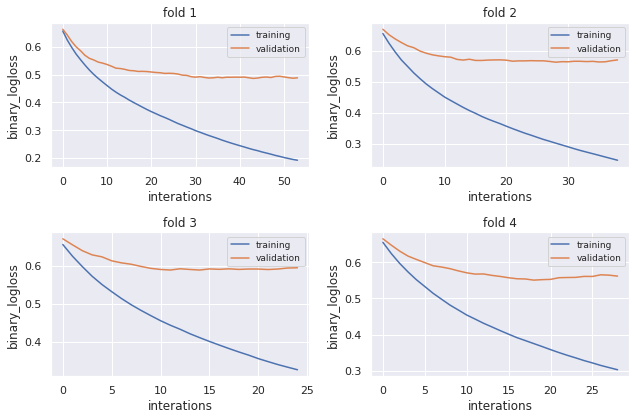

### CV scores by fold ###
fold 1: 0.4863
fold 2: 0.5633
fold 3: 0.5882
fold 4: 0.5508
fold 5: 0.5804
fold 6: 0.5894
fold 7: 0.5415
fold 8: 0.5401
fold 9: 0.5328
fold 10: 0.5571
CV mean score: 0.5530, std: 0.0293.
CPU times: user 6.79 s, sys: 188 ms, total: 6.98 s
Wall time: 4.23 s


In [ ]:
%%time
group_kfold = GroupKFold(n_splits=N_FOLDS)

feature_importance, test_pred = \
    model_training(X, y, group_kfold, s, lgb_params, 
    'binary_logloss', plt_iter=True, X_test=X_test)

Kết quả chạy cho thấy áp dụng group k fold nhưng lần chạy đầu tiên cho kết quả tốt nhất và các lần chạy sau không cải thiện độ chính xác. 

#### Model 2

- Tác giả sử dụng Ensemble của 4 mô hình sau:

  1. HistGradientBoostingClassifier
  2. RandomForestClassifier
  3. LogisticRegression
  4. XGBoost

cùng với thao tác Group K Fold với K=5, group theo mùa giải để tiến hành train ensemble model.

- Kết quả của 4 model có trọng số như nhau, tức là lấy trung bình ra kết quả dự đoán cuối cùng.

- Độ lỗi được sử dụng là binary loss entropy (log loss)

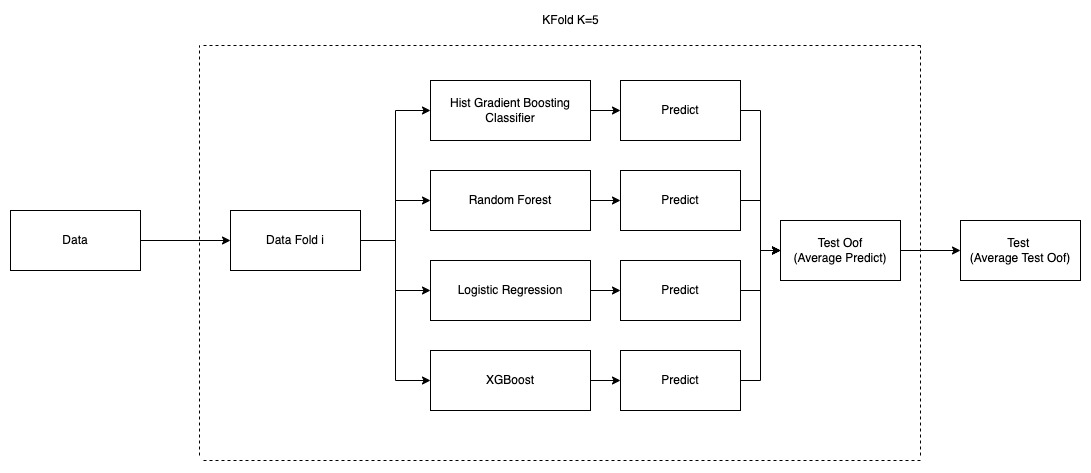

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import KFold, GroupKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
#Hàm độ lỗi binary cross entropy
from sklearn.metrics import log_loss
#Progress bar
from tqdm.notebook import tqdm

import glob
import os
import gc
import xgboost as xgb

In [ ]:
train = tourney
test = test

Thiết lập các hyper parameter cho mô hình XGBoost

In [ ]:
xgb_params= {
        "objective": "binary:logistic",

        #Độ sâu tối đa của các cây
        "max_depth": 2,
        
        "learning_rate": 0.1,

        #Tỉ lệ cột của các cây so với data gốc
        "colsample_bytree": 0.8,

        #Tỉ lệ dòng của các cây so với data gốc
        "subsample": 0.8,

        #Khi số sample trong 1 mode < min_child_weight dừng
        "min_child_weight": 30,

        #Số luồng dùng cho việc training
        "n_jobs": 2,

        #Random seed
        "seed": 2021,

        'tree_method': "gpu_hist",

        #Chỉ định gpu để train
        "gpu_id": 0,
        
        'predictor': 'gpu_predictor'
    }

Chuẩn hóa data trước khi train

In [ ]:
y = train["result"]
s = train["Season"]
# Xóa bỏ các thuộc tính định danh, label, season
X = train.drop(['Season','TeamID1','TeamID2','result'], axis=1)

X_test = test.drop(['ID', 'Season','TeamID1','TeamID2'], axis=1)

train_oof = np.zeros((X.shape[0],))
test_preds = 0
train_oof.shape

(2230,)

Tiến hành train theo Group K Fold với K=5, group theo season

In [ ]:
NUM_FOLDS = 5
# Sử dụng KFold theo Group fold, với group là các mùa giải phân biệt
kf = GroupKFold(n_splits=NUM_FOLDS)
max_iter = 550

for f, (train_ind, val_ind) in tqdm(enumerate(kf.split(X, y, s))):
        print(f'Fold {f}')
        #Chuẩn bị dự liệu, tách train, val theo Group fold
        train_df, val_df = X.iloc[train_ind], X.iloc[val_ind]
        train_target, val_target = y.iloc[train_ind], y.iloc[val_ind]
        train_df_xgb = xgb.DMatrix(train_df, label=train_target)
        val_df_xgb = xgb.DMatrix(val_df, label=val_target)
        
        model = HistGradientBoostingClassifier(
            max_iter=max_iter
            , validation_fraction=None
            , learning_rate=0.01
            , max_depth=2
            , min_samples_leaf=32)
        
        model1 = RandomForestClassifier()

        model2 = LogisticRegression(C=1)

        model4 = xgb.train(xgb_params, train_df_xgb, 1000)

        model =  model.fit(train_df, train_target)
        model1 =  model1.fit(train_df, train_target)
        model2 =  model2.fit(train_df, train_target)


        # Tính ensemble của 4 mô hình bằng cách lấy trung bình (tỉ lệ 4 mô hình bằng nhau)
        temp_oof = (model.predict_proba(val_df)[:,1] + \
                    model1.predict_proba(val_df)[:,1] + \
                    model2.predict_proba(val_df)[:,1] + \
                    model4.predict(val_df_xgb)) / 4

       # Qua mỗi fold, tiến hành dự đoán tập test, và lưu lại kết quả
        temp_test = (model.predict_proba(X_test)[:,1] \
                     + model1.predict_proba(X_test)[:,1] \
                     + model2.predict_proba(X_test)[:,1] \
                     + model4.predict(xgb.DMatrix(X_test))) / 4

        train_oof[val_ind] = temp_oof
        test_preds += temp_test/NUM_FOLDS
        
        print(log_loss(val_target, temp_oof))
        
print('CV', log_loss(y, train_oof))        
np.save('train_oof', train_oof)
np.save('test_preds', test_preds)

0it [00:00, ?it/s]

Fold 0
0.5290720403355479
Fold 1
0.5317229339904482
Fold 2
0.5803248444583902
Fold 3
0.5410970174484799
Fold 4
0.5559192168122848
CV 0.5470158038654389


Test mô hình vừa thu được

In [ ]:
test = test
MSampleSubmission = pd.read_csv('./input/ncaam-march-mania-2021/MDataFiles_Stage2/MSampleSubmissionStage2.csv')

idx = test_preds.shape[0] //2
test_preds[idx:] = 1 - test_preds[idx:]

# Tính trung bình các kết quả dự đoán cho ra kết quả dự đoán cuối cùng
pred = pd.concat([test.ID, pd.Series(test_preds)], axis=1).groupby('ID')[0]\
        .mean().reset_index().rename(columns={0:'Pred'})

# Nộp bài
sub3 = MSampleSubmission.drop(['Pred'],axis=1).merge(pred, on='ID')
pred_3 = sub3['Pred']

### Tạo file nộp bài


In [ ]:
idx = test_pred.shape[0] //2
test_pred[idx:] = 1 - test_pred[idx:]

pred = pd.concat([test.ID, pd.Series(test_pred)], axis=1).groupby('ID')[0]\
        .mean().reset_index().rename(columns={0:'Pred'})
sub = MSampleSubmission.drop(['Pred'],axis=1).merge(pred, on='ID')
sub['Pred'] = sub['Pred'] * 0.3 + sub3['Pred'] * 0.7
sub.to_csv('submission.csv', index=False)
sub.head()

,ID,Pred
0,2021_1101_1104,0.292532
1,2021_1101_1111,0.805356
2,2021_1101_1116,0.271164
3,2021_1101_1124,0.154003
4,2021_1101_1140,0.485248


## Nhìn lại quá trình làm đồ án

Kinh nghiệm thu thập từ đồ án:

- Xem xét khám phá dữ liệu
- Lựa chọn hướng giải quyết cho bài toán
- Kĩ năng làm việc nhóm và quản lí thời gian
- Khả năng giao tiếp và trình bày 
- Thu thập thông tin
- Khả năng research

## Tài liệu tham khảo

https://stackoverflow.com/questions/51022822/subsample-colsample-bytree-colsample-bylevel-in-xgbclassifier-python-3-x

https://stats.stackexchange.com/questions/317073/explanation-of-min-child-weight-in-xgboost-algorithm

https://arxiv.org/pdf/1603.02754.pdf